In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/train.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.sample(10)

,survived,age,fare
259,1,50.0,26.0000
656,0,NaN,7.8958
515,0,47.0,34.0208
766,0,NaN,39.6000
444,1,NaN,8.1125
890,0,32.0,7.7500
539,1,22.0,49.5000
63,0,4.0,27.9000
314,0,43.0,26.2500
691,1,4.0,13.4167


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   age       714 non-null    float64
 2   fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [7]:
df.isnull().mean()*100

survived     0.00000
age         19.86532
fare         0.00000
dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("survived", axis="columns")
y = df["survived"]

In [13]:
X_train, X_test, t_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

In [14]:
X_train["age_imputed"] = X_train["age"]
X_test["age_imputed"] = X_test["age"]

In [17]:
X_train["age_imputed"][X_train["age_imputed"].isnull()] = X_train["age"].dropna(
).sample(X_train["age"].isnull().sum()).values

X_test["age_imputed"][X_test["age_imputed"].isnull()] = X_test["age"].dropna(
).sample(X_test["age"].isnull().sum()).values

In [18]:
X_train.isnull().sum()

age            140
fare             0
age_imputed      0
dtype: int64

In [19]:
import seaborn as sns

C:\Users\Habib\AppData\Local\Temp\ipykernel_14032\3783672168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["age"], label="Original",hist=False)
C:\Users\Habib\AppData\Local\Temp\ipykernel_14032\3783672168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train

<Axes: xlabel='age_imputed', ylabel='Density'>

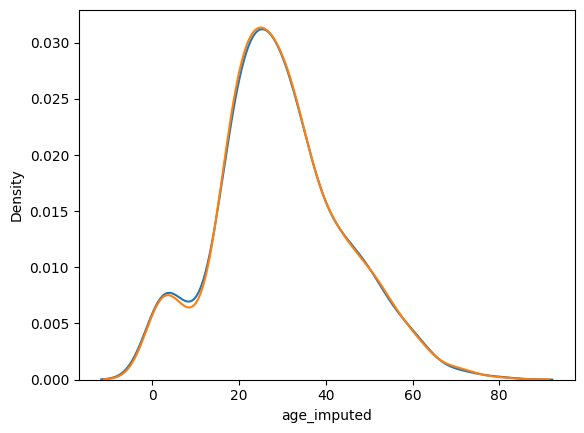

In [21]:
sns.distplot(X_train["age"], label="Original", hist=False)
sns.distplot(X_train["age_imputed"], label="Imputed", hist=False)

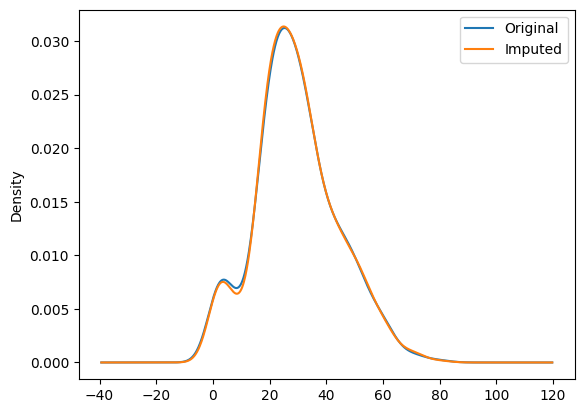

In [25]:
X_train["age"].plot(kind="kde",label="Original")
X_train["age_imputed"].plot(kind="kde",label="Imputed")
plt.legend()